![Alt Text](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/delicious-red-wine-royalty-free-image-1585590768.jpg?resize=768:*)

Before we actually start with the analysis of quality of wine, I believe that we should understand a brief history about how wine is made and what are the important factors contributing towards the quality of wine!

This is the first time I'm working on a dataset like this, please drop a comment if you like it and let me know how I can improve it!

# **A little about Red Wine**


Red wine has been part of social, religious, and cultural events for hundreds of years. Medieval monasteries believed that their monks lived longer partly because of their regular, moderate drinking of wine.

Red wine is made by crushing and fermenting dark-colored, whole grapes.

There are many types of red wine, which vary in taste and color. Common varieties include Shiraz, Merlot, Cabernet sauvignon, Pinot noir and Zinfandel.

The alcohol content usually ranges from 12–15%.

According to a 2018 study, although notably there are no official recommendations around these benefits, drinking red wine in moderation has positive links with:

    * cardiovascular disease
    * atherosclerosis
    * hypertension
    * certain types of cancer
    * type 2 diabetes
    * neurological disorders
    * metabolic syndrome

So if you're like me, an ametaeur, who doesn't know a bit about wines, let us start small and try to understand about the quality of red wine!

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [ ]:
df.head()

In [ ]:
print(df.columns)
print(df.shape)

Understanding the different features of wine, we see that there are a total of 12 columns including the final quality parameter. Let us try to find out what these columns mean and how doo they contribute in determing the quality of the red wine!

* **Fixed Acidity:** are non-volatile acids that do not evaporate readily

* **Volatile Acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste

* **Citric Acid:** acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

* **Residual Sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

* **Chlorides:** the amount of salt in the wine

* **Free Sulfur Dioxide:** it prevents microbial growth and the oxidation of wine

* **Total Sulfur Dioxide:** is the amount of free + bound forms of SO2

* **Density:** sweeter wines have a higher density

* **pH:** describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

* **Alcohol:** available in small quantities in wines makes the drinkers sociable

* **Sulphates:** a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

* **Quality:** which is the output variable/predictor


Now we have a basic knowledge of various factors that influence the quality of good wine, Shall we drink to that? 🥂

In [ ]:
df.info()

So thankfully there are no null values in the dataset. It will save our time from doing imputing.
What is imputing, you may ask? Without making it too boring, let me give you a link [HERE](http://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

**Did we forget to learn about how wine was discovered? Its an interesting story...
Well, better late than never!**

**WHEN WAS WINE FIRST CREATED?**

No one can be sure, but there is an ancient Persian fable that recognises a woman as the discoverer of wine. According to the fable, she was a princess who had lost favour with the King. The shame was so overwhelming that she ate some table grapes that had spoiled in their jar in an attempt to end her life.

![Alt Text](https://data.whicdn.com/images/337136063/original.jpg)

Her suicide did not go as planned - instead of slipping into eternal slumber she got giddy, intoxicated and then passed out. When she awoke she found all the troubles of her life seemed to have passed. She continued to eat the spoilt grapes and her mood changed so much that she regained the favor of the King.

Although this is a pleasant tale, the accidental discovery of wine probably happened a few times in different regions, but what is for sure is the invention of wine is down to pure dumb luck.

In [ ]:
df.describe().T

**A few observations:**

* The quality of wine varies from 3 to 8, where 6 is the average quality.
* The maximum alcohol level in the wine is 14.9 and minimum is 8.4
* The pH level of wine varies between 2.74 to 4.01.
* The average density of wine is 0.9956.
* Total sulpher dioxide varies between 6.0 to 289.0.
 

In [ ]:
df.nunique()

**Note:** One must note that there are a total of 6 diffeerent qualities of wine.

In [ ]:
df.duplicated().sum()

**Note:** It is important to note that although there are a total of 240 duplicate rows, we will not be removing them. Why, you may ask? This is because we are assuming that this survey was made by different unique wine tasters who may have given same ratings. 

In [ ]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df, palette='pastel')

**Note:** The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'. If we leave it as it is, it might create some problem  for us in predicting the quality of the wine. Alternatively, we can also undersample the category '5' and '6' and oversample the remaining ones.
Anyway, we'll decide it later.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

**Observation:** Almost all the parameters except citric acid contains a lot of outliers. We may have to do something about that!

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

In [ ]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

**Note:** We see that some of our columns are highly skewed towards right. These columns include Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. So we need to tranform it. Applying a log transfrom will solve the problem!

In [ ]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

In [ ]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

Great, our one problem is solved. Let's move forward!

In [ ]:
df.corr()['quality'].sort_values(ascending=False)

**Note:** Although none of the columns show high correlation with the target colummn, we can say that Alcohol, Sulphates, Volatile acidity have the highest correlations.


Coming to the most important part, we will now be doing undersampling and oversampling.

![Alt Test](https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png)

I hope that the image would have given us an idea of what oversampling and undersampling actually is!

In layman's terms,

* The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

* In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.


In [ ]:
df_3 = df[df.quality==3]     # MINORITY          
df_4 = df[df.quality==4]     # MINORITY          
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY

#We had already established it earlier that except quality 5 and 6, all the others are minority!

In [ ]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)


In [ ]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)


# Display new class counts
Balanced_df.quality.value_counts()           


We can see that the count of all of our quality categories have been made equal!

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8], palette='pastel')

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

In [ ]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

**Note:** Since residual sugar does not come under the top 10 highlu correlated features, we'll be dropping it. 

In [ ]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [ ]:
X = Balanced_df[selected_features]
y = Balanced_df.quality

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% and 30% to construct Training and Testing Data respectively.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)

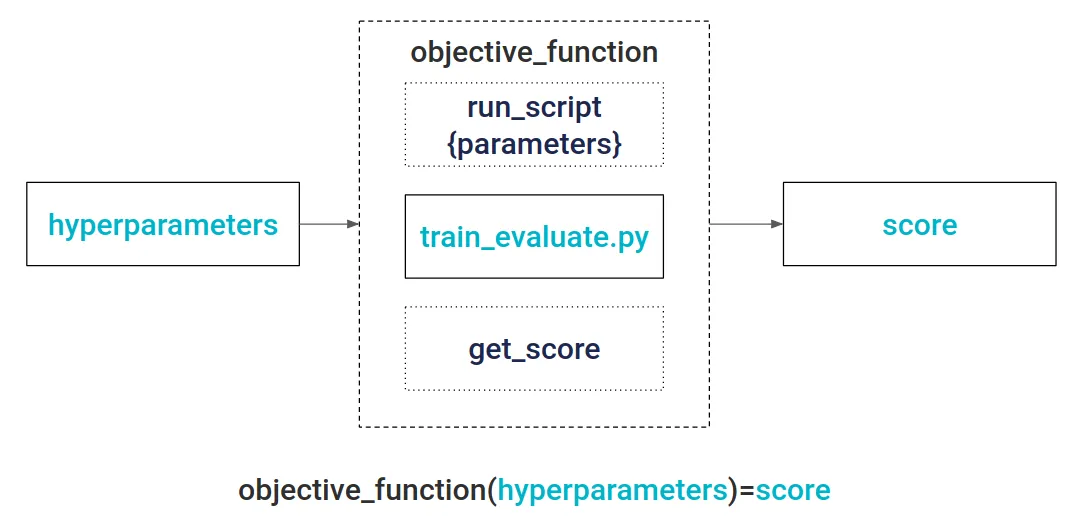

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

In [ ]:
# For weights = 'distance'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

In [ ]:
# Creating a k-nearest neighbors Classifier
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model using the training set
KNN_Model.fit(X_train, y_train) 
results = KNN_Model.fit(X_train, y_train)

Lets first try be performing our predictions on the training data

In [ ]:
KNN_train_predictions = KNN_Model.predict(X_train)

Now, we'll do the same on the test data as well!

In [ ]:
KNN_test_predictions = KNN_Model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))

# **Conclusion:** 

We're able to construct a fairly good model with moderate accuracy. 

With all the analysis, visualizations, Modeling and interpretation of the model, now I am sure that we know the important parameters which help us in deciding the best wine are:

alcohol, volatile acidity, sulphates, density, total_sulfur_dioxide, and they will improve the wine quality.


Lets revist what have we done so far?

* First, we tried to understand our dataset, what each column signified and how does it contribute in determining the quality of wine. 
* Then we visualized the data from statistical stand point.
* Tried to find anamolies and eliminated them. Also found patterns in the data
* Fitted data to our model
* Evaluated our model



I would be glad if you could suggest me any improvements in the following notebook!
Please upvote if you like my work

![Alt Text](https://images.hindustantimes.com/rf/image_size_960x540/HT/p2/2017/10/29/Pictures/_919ed6c6-bc82-11e7-8fe3-8a4365deb777.jpg)